In [1]:
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
madrid_temp = pd.read_csv('/home/evangelo/decision-dill-student-code/week07/Madrid_Retiro_Dataset/TG_STAID000230.txt', header=14, sep=',', parse_dates=True)

In [3]:
madrid_temp.columns = ['SOUID', 'date', 'temperature', 'quality']

In [4]:
madrid_temp.drop(columns=['SOUID', 'quality'], inplace=True)

In [5]:
madrid_temp['date'] = pd.to_datetime(madrid_temp['date'],format="%Y%m%d")

In [6]:
madrid_temp['temperature'] = madrid_temp['temperature']/10

In [7]:
madrid_temp.set_index('date', inplace=True)
madrid_temp.loc['2019-01-01']

temperature    6.6
Name: 2019-01-01 00:00:00, dtype: float64

In [8]:
madrid_temp_4_years = madrid_temp.loc['2019-01-01':'2023-04-30']

In [9]:
madrid_temp_4_years

,temperature
date,
2019-01-01,6.6
2019-01-02,6.0
2019-01-03,7.3
2019-01-04,5.9
2019-01-05,5.4
...,...
2023-04-26,21.2
2023-04-27,23.2
2023-04-28,24.8


In [10]:
madrid_temp_4_years.isnull().sum()

temperature    0
dtype: int64

In [11]:
madrid_temp_4_years['timestep'] = range(len(madrid_temp_4_years))

/tmp/ipykernel_7135/1831609172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_4_years['timestep'] = range(len(madrid_temp_4_years))


In [12]:
madrid_temp_4_years

,temperature,timestep
date,,
2019-01-01,6.6,0
2019-01-02,6.0,1
2019-01-03,7.3,2
2019-01-04,5.9,3
2019-01-05,5.4,4
...,...,...
2023-04-26,21.2,1576
2023-04-27,23.2,1577
2023-04-28,24.8,1578


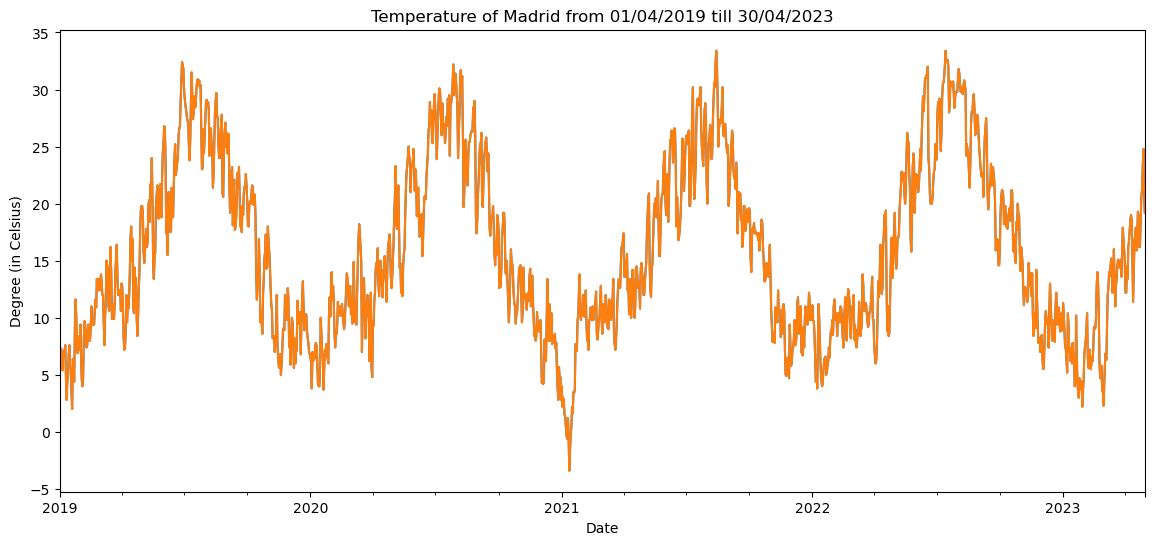

In [13]:
madrid_temp_4_years['temperature'].plot();
plt.plot(madrid_temp_4_years.index, madrid_temp_4_years.temperature)
plt.gca().set(title='Temperature of Madrid from 01/04/2019 till 30/04/2023', xlabel='Date', ylabel="Degree (in Celsius)");

/tmp/ipykernel_7135/130910071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_4_years['trend'] = lr.predict(X)


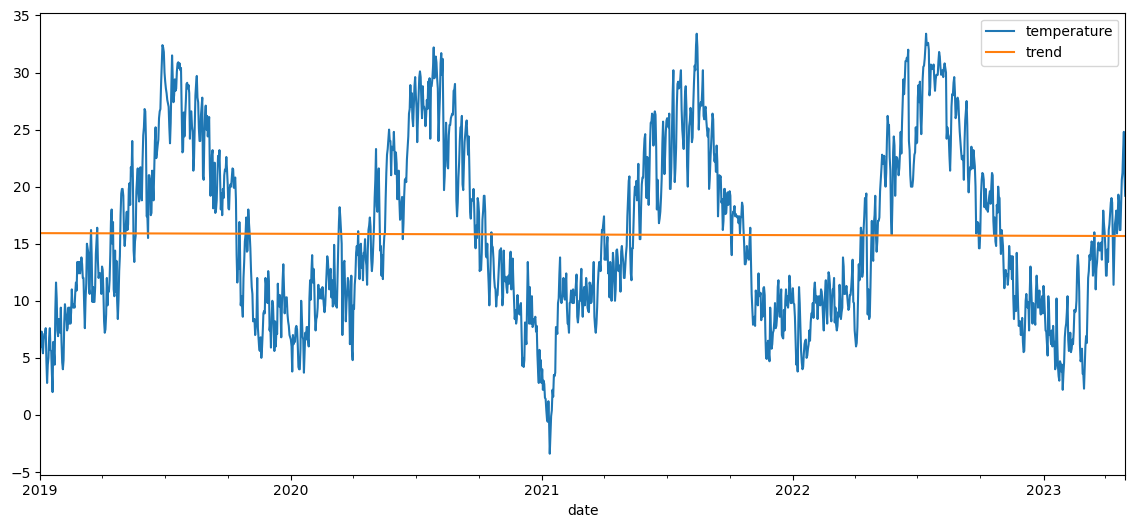

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = madrid_temp_4_years['temperature']
X = madrid_temp_4_years[['timestep']]
lr.fit(X,y)

madrid_temp_4_years['trend'] = lr.predict(X)
madrid_temp_4_years[['temperature', 'trend']].plot();
plt.legend(bbox_to_anchor=(1,1));

/tmp/ipykernel_7135/1029392837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_4_years['wo_trend'] = madrid_temp_4_years['temperature'] - madrid_temp_4_years['trend']


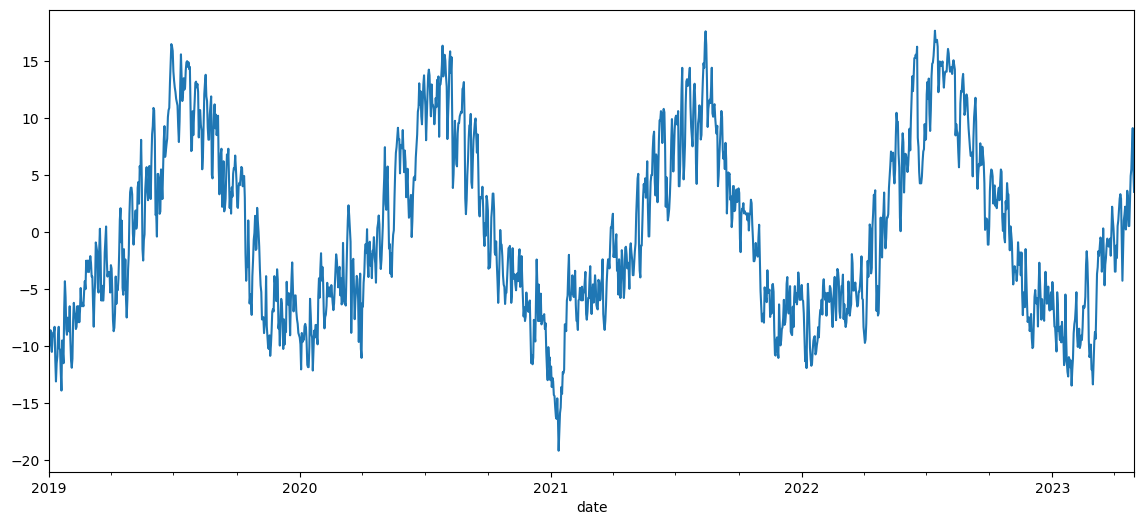

In [15]:
madrid_temp_4_years['wo_trend'] = madrid_temp_4_years['temperature'] - madrid_temp_4_years['trend']
madrid_temp_4_years['wo_trend'].plot();

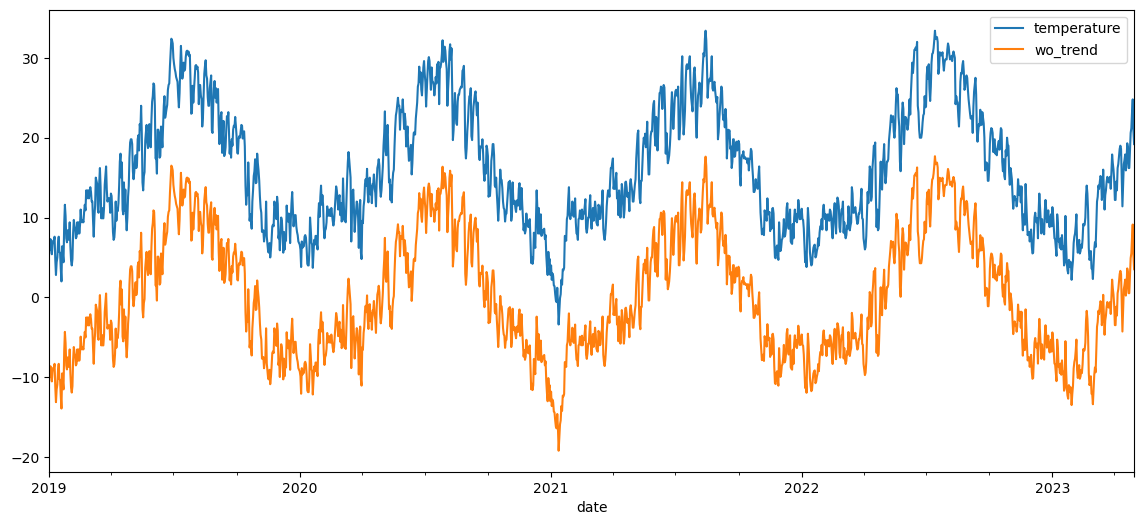

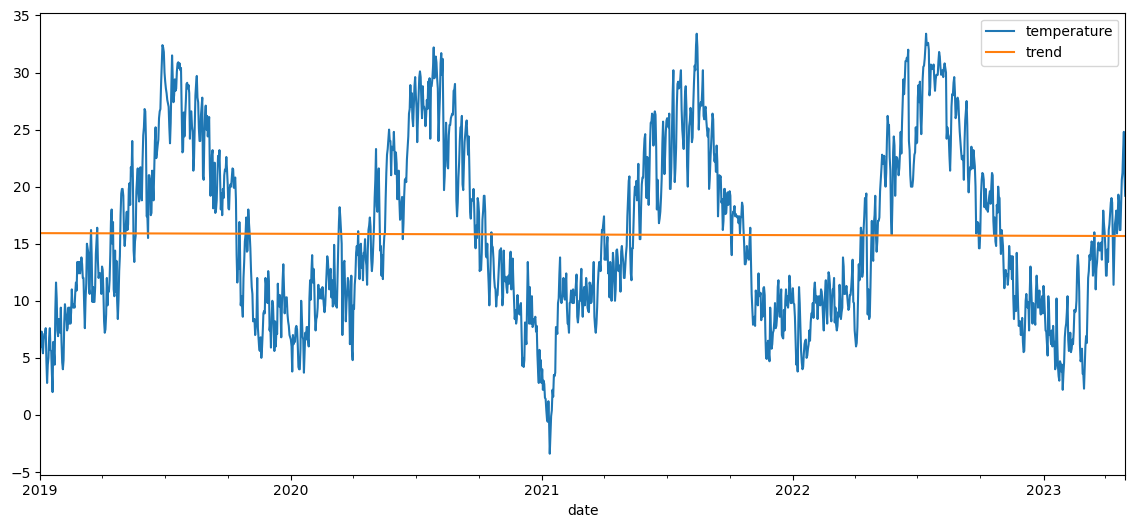

In [16]:
madrid_temp_4_years[['temperature','wo_trend']].plot();
plt.legend(bbox_to_anchor=(1,1));
madrid_temp_4_years[['temperature', 'trend']].plot();
plt.legend(bbox_to_anchor=(1,1));

In [17]:
def plot_temperature(df, title, ylim=True):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('Temperature')
    #if ylim:
    #    plt.ylim(ymin=0)
    plt.legend(bbox_to_anchor=(1,1));
    plt.show()

In [18]:
seasonal_dummies_4_years = pd.get_dummies(madrid_temp_4_years.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(madrid_temp_4_years.index)

madrid_temp_4_years = madrid_temp_4_years.join(seasonal_dummies_4_years)

In [19]:
madrid_temp_4_years.drop(columns=['wo_trend', 'trend'], inplace=True)

In [20]:
len(madrid_temp_4_years)

1581

In [21]:
madrid_temp_4_years[['temperature']].describe()

,temperature
count,1581.000000
mean,15.801455
std,7.611323
min,-3.400000
25%,9.800000
50%,14.300000
75%,21.600000
max,33.400000


In [22]:
1581*0.25

395.25

In [23]:
madrid_temp_4_years_train = madrid_temp_4_years[:-395]
madrid_temp_4_years_test = madrid_temp_4_years[-395:]

In [24]:
madrid_temp_4_years_test

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
2022-04-01,7.4,1186,0,0,1,0,0,0,0,0,0,0,0
2022-04-02,6.7,1187,0,0,1,0,0,0,0,0,0,0,0
2022-04-03,6.0,1188,0,0,1,0,0,0,0,0,0,0,0
2022-04-04,6.3,1189,0,0,1,0,0,0,0,0,0,0,0
2022-04-05,7.7,1190,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,21.2,1576,0,0,1,0,0,0,0,0,0,0,0
2023-04-27,23.2,1577,0,0,1,0,0,0,0,0,0,0,0
2023-04-28,24.8,1578,0,0,1,0,0,0,0,0,0,0,0


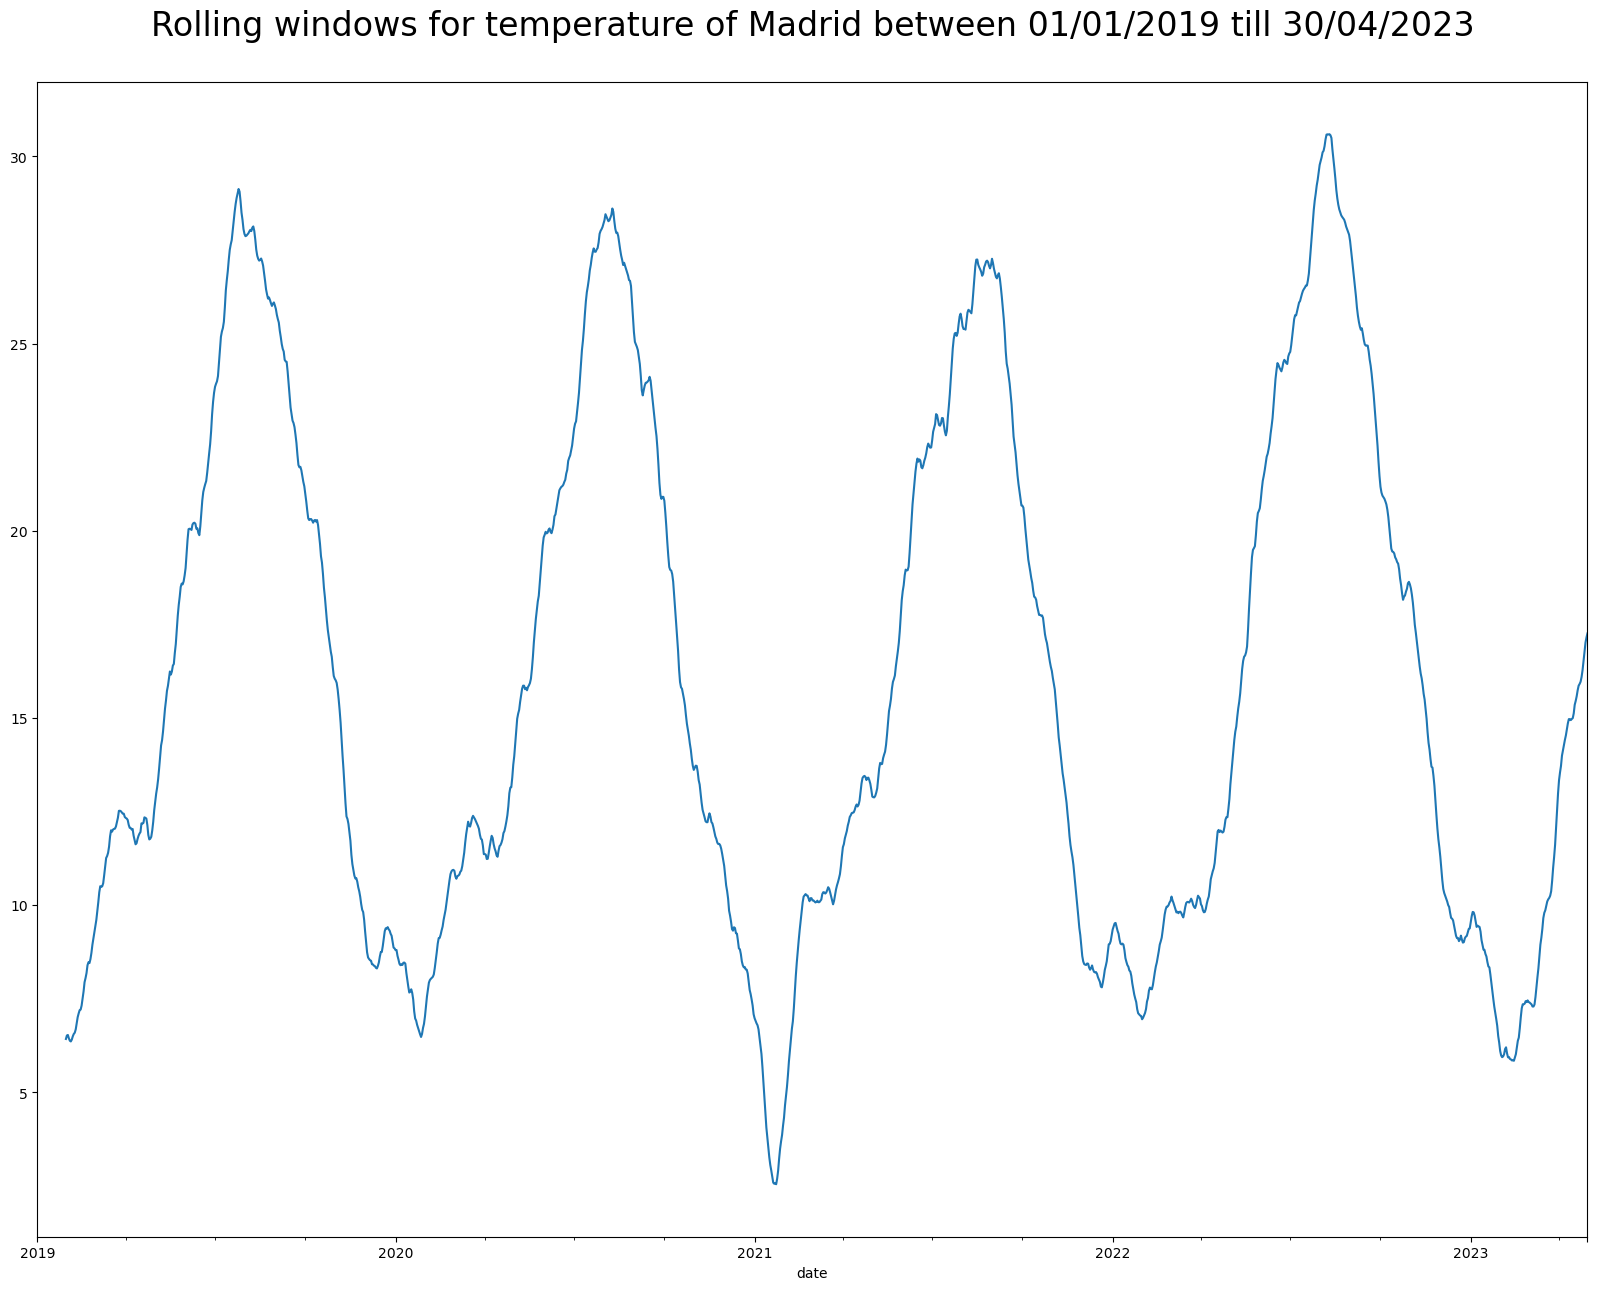

In [25]:
madrid_temp_4_years_mean= madrid_temp_4_years.temperature.rolling(window=30).mean()
madrid_temp_4_years_mean.plot(figsize=(20,15));
plt.title('Rolling windows for temperature of Madrid between 01/01/2019 till 30/04/2023\n', fontsize=24);

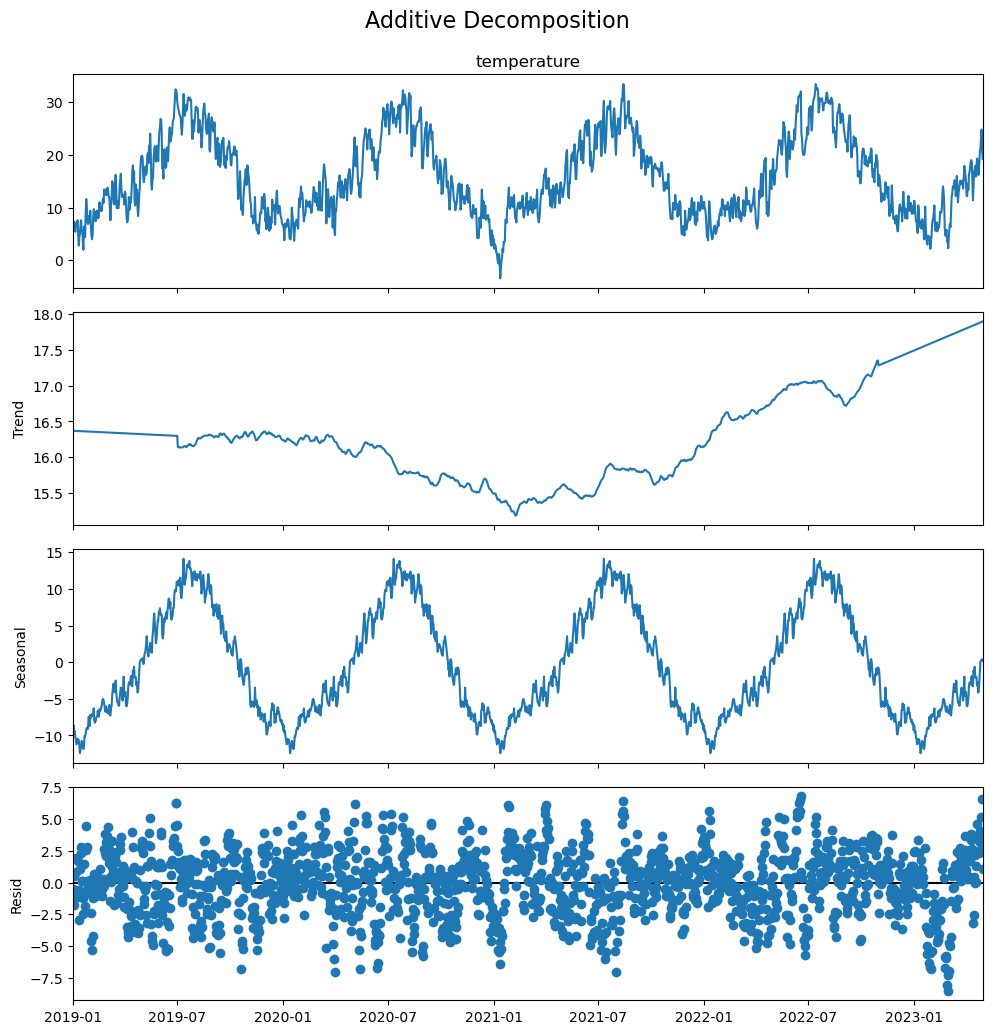

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(madrid_temp_4_years.temperature, model='additive', extrapolate_trend='freq', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot();
plt.suptitle('Additive Decomposition\n', fontsize=16, va='bottom')
plt.show()


In [27]:
# Shift the current temperature to the next day. 
predicted_df = madrid_temp_4_years["temperature"].to_frame().shift(1).rename(columns = {"temperature": "temperature_pred" })
actual_df = madrid_temp_4_years.temperature.to_frame().rename(columns = {"temperature": "temperature_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,temperature_actual,temperature_pred
date,,
2019-01-02,6.0,6.6
2019-01-03,7.3,6.0
2019-01-04,5.9,7.3
2019-01-05,5.4,5.9
2019-01-06,6.6,5.4
2019-01-07,7.1,6.6
2019-01-08,7.1,7.1
2019-01-09,7.6,7.1
2019-01-10,4.7,7.6


In [28]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.temperature_actual, one_step_df.temperature_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 1.9112160619466962


In [29]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

import statsmodels.tsa.statespace.sarimax
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = statsmodels.tsa.statespace.sarimax.SARIMAX(one_step_df.temperature_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28115D+00    |proj g|=  3.18254D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.021D-07   4.281D+00
  F =   4.2811484989172879     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13530.42925657863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.77497D+00    |proj g|=  8.21419D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   8.083D-06   3.775D+00
  F =   3.7749627227625138     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11932.882203929543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85747D+00    |proj g|=  1.90878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.79661D+00    |proj g|=  2.48382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   3.955D-07   2.797D+00
  F =   2.7966082199837321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8841.281975148593
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85347D+00    |proj g|=  8.27841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.81532D+00    |proj g|=  4.43409D-02

At iterate   10    f=  2.81516D+00    |proj g|=  2.45131D-02

At iterate   15    f=  2.81511D+00    |proj g|=  1.15188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   9.415D-09   2.815D+00
  F =   2.8151092160793842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8901.745122810855
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.78497D+00    |proj g|=  3.67914D-02

At iterate   10    f=  2.78411D+00    |proj g|=  2.24856D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.249D-06   2.784D+00
  F =   2.7841067407145030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8803.77730065783
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95863D+00    |proj g|=  6.85880D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.79576D+00    |proj g|=  5.00804D-02

At iterate   10    f=  3.37366D+00    |proj g|=  6.85180D-01

At iterate   15    f=  3.21094D+00    |proj g|=  1.49081D-01

At iterate   20    f=  3.20850D+00    |proj g|=  9.82130D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     34      1     0     0   3.732D-07   3.209D+00
  F =   3.2085000792650220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10144.86025047747
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.43569D+00    |proj g|=  6.71386D-02

At iterate   10    f=  2.42063D+00    |proj g|=  7.82725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   1.140D-05   2.421D+00
  F =   2.4206256640675887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7655.17709845358
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82228D+00    |proj g|=  8.81940D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  2.64832D+00    |proj g|=  1.53247D+00

At iterate   15    f=  2.50003D+00    |proj g|=  6.30726D-02

At iterate   20    f=  2.49884D+00    |proj g|=  4.43996D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     42      1     0     0   4.440D-06   2.499D+00
  F =   2.4988378694653228     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7902.327667510421
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  3.69849D+00    |proj g|=  7.34014D-02

At iterate   10    f=  3.32769D+00    |proj g|=  5.84870D-01

At iterate   15    f=  2.70038D+00    |proj g|=  6.80281D-01

At iterate   20    f=  2.44217D+00    |proj g|=  1.85879D-01

At iterate   25    f=  2.43607D+00    |proj g|=  2.60140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     71      1     0     0   2.601D-05   2.436D+00
  F =   2.4360676954941423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7705.973917761489
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.43445D+00    |proj g|=  7.60060D-02

At iterate   10    f=  2.41566D+00    |proj g|=  4.96811D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   5.278D-06   2.416D+00
  F =   2.4156609076235096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7639.488468090291
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53751D+00    |proj g|=  1.21967D+00


 This problem is unconstrained.



At iterate    5    f=  2.41825D+00    |proj g|=  4.53841D-02

At iterate   10    f=  2.41264D+00    |proj g|=  8.84014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   1.745D-06   2.413D+00
  F =   2.4125912038366959     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7631.788204123959
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06452D+00    |proj g|=  5.06366D-04

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:7595.6508786572285
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11668D+00    |proj g|=  2.43979D-01


 This problem is unconstrained.



At iterate    5    f=  2.05020D+00    |proj g|=  3.75674D-03

At iterate   10    f=  2.05018D+00    |proj g|=  1.79639D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     14      1     0     0   1.796D-06   2.050D+00
  F =   2.0501762745377778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:6482.5570275393775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05147D+00    |proj g|=  4.94018D-06

           *

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:6486.642032314578
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05043D+00    |proj g|=  1.57740D-03

At iterate    5    f=  2.05041D+00    |proj g|=  3.71791D-03

At iterate   10    f=  2.04975D+00    |proj g|=  1.08253D-02

At iterate   15    f=  2.04962D+00    |proj g|=  6.54916D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   6.549D-06   2.050D+00
  F =   2.0496239888733485     

CONVERGENCE: 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.13883D+00    |proj g|=  2.10736D-01

At iterate    5    f=  2.05692D+00    |proj g|=  3.47001D-02
  ys=-2.032E-03  -gs= 6.340E-04 BFGS update SKIPPED

At iterate   10    f=  2.05018D+00    |proj g|=  3.75282D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     28      1     1     0   8.126D-06   2.050D+00
  F =   2.0501760194744594     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      9      1     0     0   5.887D-06   2.047D+00
  F =   2.0474443868014758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6475.924262292664
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40030D+00    |proj g|=  2.25316D-02

At iterate    5    f=  2.39991D+00    |proj g|=  5.63105D-08

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.


SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:7587.70413922524
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17311D+00    |proj g|=  1.58907D-01


 This problem is unconstrained.



At iterate    5    f=  2.04719D+00    |proj g|=  1.88779D-02

At iterate   10    f=  2.04693D+00    |proj g|=  3.12663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   3.127D-05   2.047D+00
  F =   2.0469326415865123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6474.307147413379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05016D+00    |proj g|=  2.20927D-02

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.04740D+00    |proj g|=  2.23962D-03

At iterate   10    f=  2.04678D+00    |proj g|=  2.00098D-02

At iterate   15    f=  2.04645D+00    |proj g|=  2.59313D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     22      1     0     0   2.593D-06   2.046D+00
  F =   2.0464528532104911     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:6474.791016145152
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.23644D+00    |proj g|=  4.62782D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.068D-06   2.236D+00
  F =   2.2364419368796846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:7073.156520539803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18824D+00    |proj g|=  1.43464D-01


 This problem is unconstrained.



At iterate    5    f=  2.05170D+00    |proj g|=  1.97864D-02

At iterate   10    f=  2.04693D+00    |proj g|=  1.29256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     21      1     0     0   1.228D-06   2.047D+00
  F =   2.0469324066072865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:6476.306404879026
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06434D+00    |proj g|=  4.21809D-04

           * 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  2.05023D+00    |proj g|=  9.90622D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     29      1     0     0   2.152D-05   2.050D+00
  F =   2.0502337158706925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6484.738542151388
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35198D+00    |proj g|=  1.36676D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.367D-05   2.352D+00
  F =   2.3519795565735757     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:7436.255398772499
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19582D+00    |proj g|=  1.76369D-01

At iterate    5    f=  2.06666D+00    |proj g|=  1.19916D-01

At iterate   10    f=  2.04347D+00    |proj g|=  3.41885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   3.447D-06   2.043D+00
  F =   2.0434619152788152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0

 This problem is unconstrained.



At iterate   15    f=  2.05021D+00    |proj g|=  1.26034D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   9.556D-06   2.050D+00
  F =   2.0502115849517168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6484.668608447426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18233D+00    |proj g|=  6.10330D-01


 This problem is unconstrained.



At iterate    5    f=  2.05540D+00    |proj g|=  3.09702D-01

At iterate   10    f=  2.05322D+00    |proj g|=  2.71095D-02

At iterate   15    f=  2.05249D+00    |proj g|=  2.35300D-02

At iterate   20    f=  2.05107D+00    |proj g|=  3.09496D-02

At iterate   25    f=  2.04974D+00    |proj g|=  1.09933D-01

At iterate   30    f=  2.04956D+00    |proj g|=  3.74938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     51      1     0     0   3.972D-07   2.050D+00
  F =   2.0495574028317987     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:6484.60139294

 This problem is unconstrained.


SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6948.461032539852
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20500D+00    |proj g|=  1.35527D-01


 This problem is unconstrained.



At iterate    5    f=  2.06158D+00    |proj g|=  2.16103D-01
  ys=-1.131E-02  -gs= 4.496E-03 BFGS update SKIPPED

At iterate   10    f=  2.04388D+00    |proj g|=  2.77573D-02

At iterate   15    f=  2.04346D+00    |proj g|=  7.83484D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     34      1     1     0   3.000D-05   2.043D+00
  F =   2.0434619103933458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:6465.339636842972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.04762D+00    |proj g|=  2.96602D-02

At iterate   10    f=  2.04727D+00    |proj g|=  4.04914D-04

At iterate   15    f=  2.04727D+00    |proj g|=  1.34495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     34      1     0     0   1.345D-04   2.047D+00
  F =   2.0472701995274063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:6477.3738305066045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:7383.232521976488
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18561D+00    |proj g|=  1.68430D-01


 This problem is unconstrained.



At iterate    5    f=  2.05779D+00    |proj g|=  9.56597D-02

At iterate   10    f=  2.03949D+00    |proj g|=  6.61676D-03

At iterate   15    f=  2.03948D+00    |proj g|=  3.23679D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   3.237D-06   2.039D+00
  F =   2.0394806793797864     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:6452.758946840126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.


At iterate   10    f=  2.04975D+00    |proj g|=  2.24537D-01

At iterate   15    f=  2.04833D+00    |proj g|=  1.74401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   3.413D-04   2.048D+00
  F =   2.0483257459660038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:6480.709357252572
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17918D+00    |proj g|=  6.09309D-01


 This problem is unconstrained.



At iterate    5    f=  2.05547D+00    |proj g|=  2.46738D-01

At iterate   10    f=  2.04992D+00    |proj g|=  2.29045D-02

At iterate   15    f=  2.04967D+00    |proj g|=  2.54221D-02

At iterate   20    f=  2.04812D+00    |proj g|=  8.57065D-02

At iterate   25    f=  2.04720D+00    |proj g|=  1.50239D-01

At iterate   30    f=  2.04651D+00    |proj g|=  4.50460D-03

At iterate   35    f=  2.04649D+00    |proj g|=  8.82450D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     54      1     0     0   8.824D-07   2.046D+00
  F =   2.0464918823377110     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  2.18722D+00    |proj g|=  2.64746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   5.365D-07   2.187D+00
  F =   2.1872169388786915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:6919.605526856665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19364D+00    |proj g|=  1.20041D-01


 This problem is unconstrained.



At iterate    5    f=  2.08188D+00    |proj g|=  2.73139D-01

At iterate   10    f=  2.04013D+00    |proj g|=  1.40557D-01

At iterate   15    f=  2.03949D+00    |proj g|=  9.89736D-03

At iterate   20    f=  2.03948D+00    |proj g|=  4.43454D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     35      1     0     0   4.435D-06   2.039D+00
  F =   2.0394806877274991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:6454.758973218897
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17459D+00    |proj g|=  1.59407D-01

At iterate    5    f=  2.04944D+00    |proj g|=  1.71088D-02

At iterate   10    f=  2.04921D+00    |proj g|=  1.63616D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   1.636D-05   2.049D+00
  F =   2.0492127376793356     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6481.512251066701
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.04930D+00    |proj g|=  3.99165D-03

At iterate   10    f=  2.04867D+00    |proj g|=  9.56520D-03

At iterate   15    f=  2.04860D+00    |proj g|=  3.51581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   3.516D-06   2.049D+00
  F =   2.0486031341846394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:6481.585904023461
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  2.23552D+00    |proj g|=  6.96923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.102D-06   2.236D+00
  F =   2.2355225088236148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:7070.251127882622
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18979D+00    |proj g|=  1.43022D-01

At iterate    5    f=  2.04967D+00    |proj g|=  3.59098D-01

At iterate   10    f=  2.04921D+00    |proj g|=  1.60728D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     25      1     0     0   6.630D-04   2.049D+00
  F =   2.0492123989594990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:6483.5111807120165
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05048D+00    |proj g|=  5.51146D-02


 This problem is unconstrained.



At iterate    5    f=  2.04479D+00    |proj g|=  8.62444D-02

At iterate   10    f=  2.02802D+00    |proj g|=  2.65062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     31      1     0     0   2.587D-05   2.028D+00
  F =   2.0277353562597344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:6415.643725780761
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40237D+00    |proj g|=  3.47249D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f=  2.37497D+00    |proj g|=  2.89820D-01
  ys=-3.129E-02  -gs= 1.008E-02 BFGS update SKIPPED

At iterate   15    f=  2.37122D+00    |proj g|=  5.00606D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     37      1     1     0   9.595D-07   2.371D+00
  F =   2.3712156691445005     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:7499.041514496622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  2.04873D+00    |proj g|=  1.19292D-02

At iterate   10    f=  2.04857D+00    |proj g|=  1.47639D-03

At iterate   15    f=  2.04790D+00    |proj g|=  1.31364D-01

At iterate   20    f=  2.04221D+00    |proj g|=  1.54583D-02

At iterate   25    f=  2.04203D+00    |proj g|=  5.43920D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   5.439D-06   2.042D+00
  F =   2.0420335475825850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:6460.82601036097
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  2.04589D+00    |proj g|=  9.44495D-02

At iterate   10    f=  2.02920D+00    |proj g|=  3.14842D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     26      1     0     0   5.585D-06   2.029D+00
  F =   2.0291866766964270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:6420.229898360709
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05046D+00    |proj g|=  5.51401D-02


 This problem is unconstrained.



At iterate    5    f=  2.04474D+00    |proj g|=  8.83117D-02

At iterate   10    f=  2.02767D+00    |proj g|=  3.00975D-02

At iterate   15    f=  2.02728D+00    |proj g|=  9.49759D-03

At iterate   20    f=  2.02665D+00    |proj g|=  4.52012D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     39      1     0     0   2.587D-05   2.027D+00
  F =   2.0266438056790617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:6414.194425945835
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  2.23602D+00    |proj g|=  3.17018D-03
  ys=-1.338E-02  -gs= 1.812E-03 BFGS update SKIPPED

At iterate   10    f=  2.19822D+00    |proj g|=  5.51947D-02

At iterate   15    f=  2.19657D+00    |proj g|=  7.58251D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     29      1     1     0   7.583D-06   2.197D+00
  F =   2.1965658310842215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:6949.14802622614
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0

 This problem is unconstrained.



At iterate    5    f=  2.05339D+00    |proj g|=  1.35951D-02

At iterate   10    f=  2.04858D+00    |proj g|=  6.19629D-04

At iterate   15    f=  2.04849D+00    |proj g|=  5.32644D-02

At iterate   20    f=  2.04368D+00    |proj g|=  9.03898D-02

At iterate   25    f=  2.04205D+00    |proj g|=  3.97452D-03

At iterate   30    f=  2.04203D+00    |proj g|=  1.32402D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     51      1     0     0   1.877D-05   2.042D+00
  F =   2.0420333668573187     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:6462.82543926

SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:6414.194425945835

In [31]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod_opt = sm.tsa.statespace.SARIMAX(one_step_df.temperature_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_opt = mod_opt.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05046D+00    |proj g|=  5.51401D-02


 This problem is unconstrained.



At iterate    5    f=  2.04474D+00    |proj g|=  8.83117D-02

At iterate   10    f=  2.02767D+00    |proj g|=  3.00975D-02

At iterate   15    f=  2.02728D+00    |proj g|=  9.49759D-03

At iterate   20    f=  2.02665D+00    |proj g|=  4.52012D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     39      1     0     0   2.587D-05   2.027D+00
  F =   2.0266438056790617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


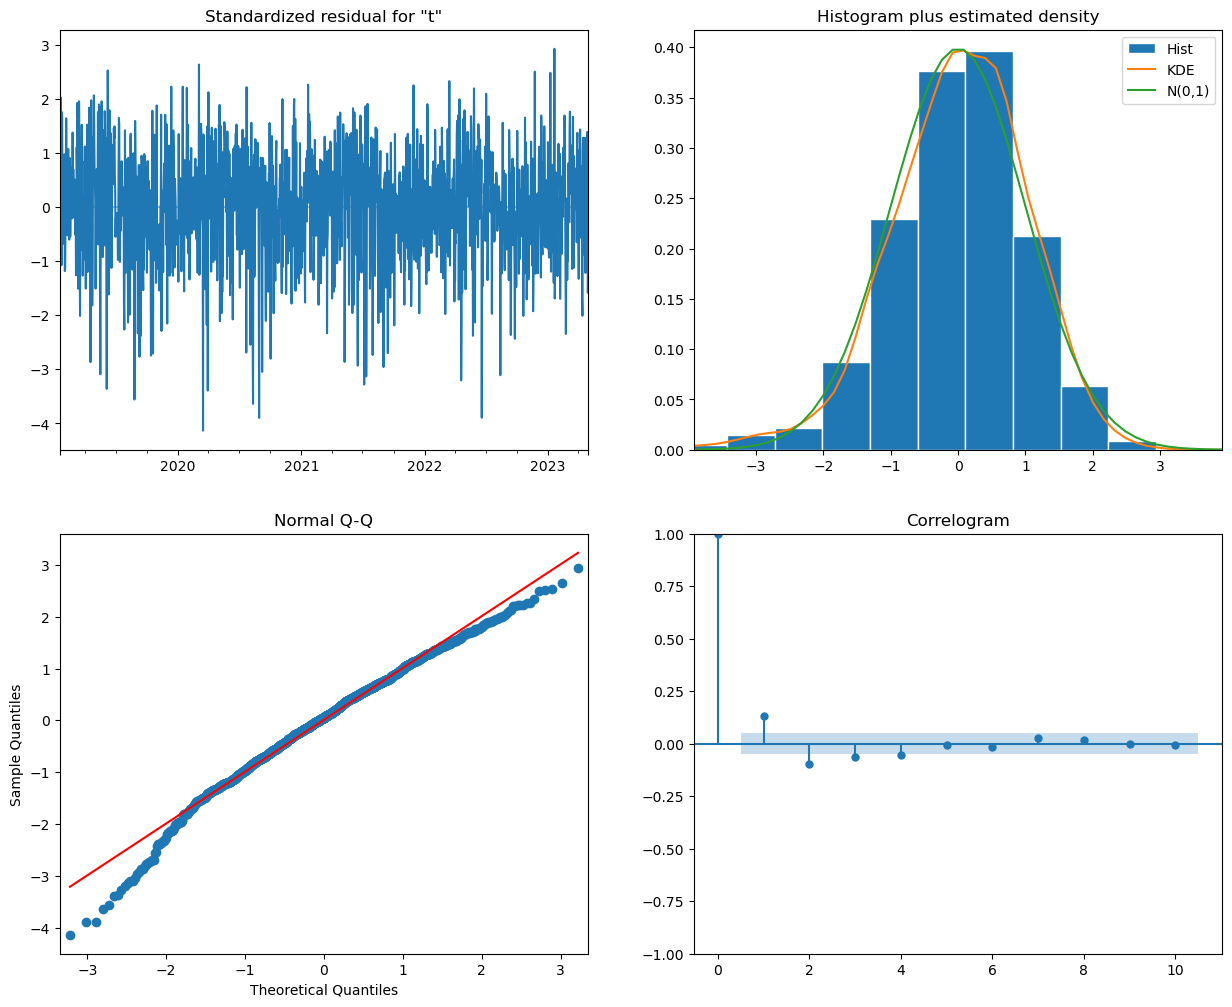

In [32]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

   * In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
   
   * The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
   
   * The residuals over time (top left plot) do not display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.


In [33]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

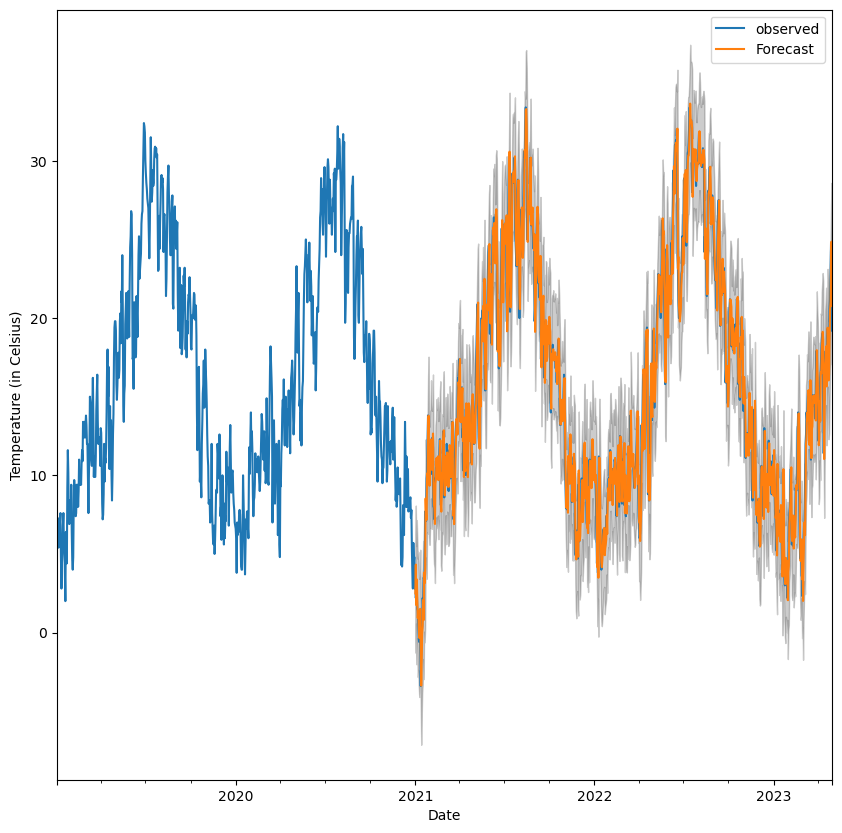

In [34]:
ax = one_step_df.temperature_actual['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
#plt.ylim([-20,30])
plt.legend()
plt.show()

In [35]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.temperature_actual['2021-01-01':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(850,)
(850,)
The Mean Squared Error of our forecasts is 3.32


In [36]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

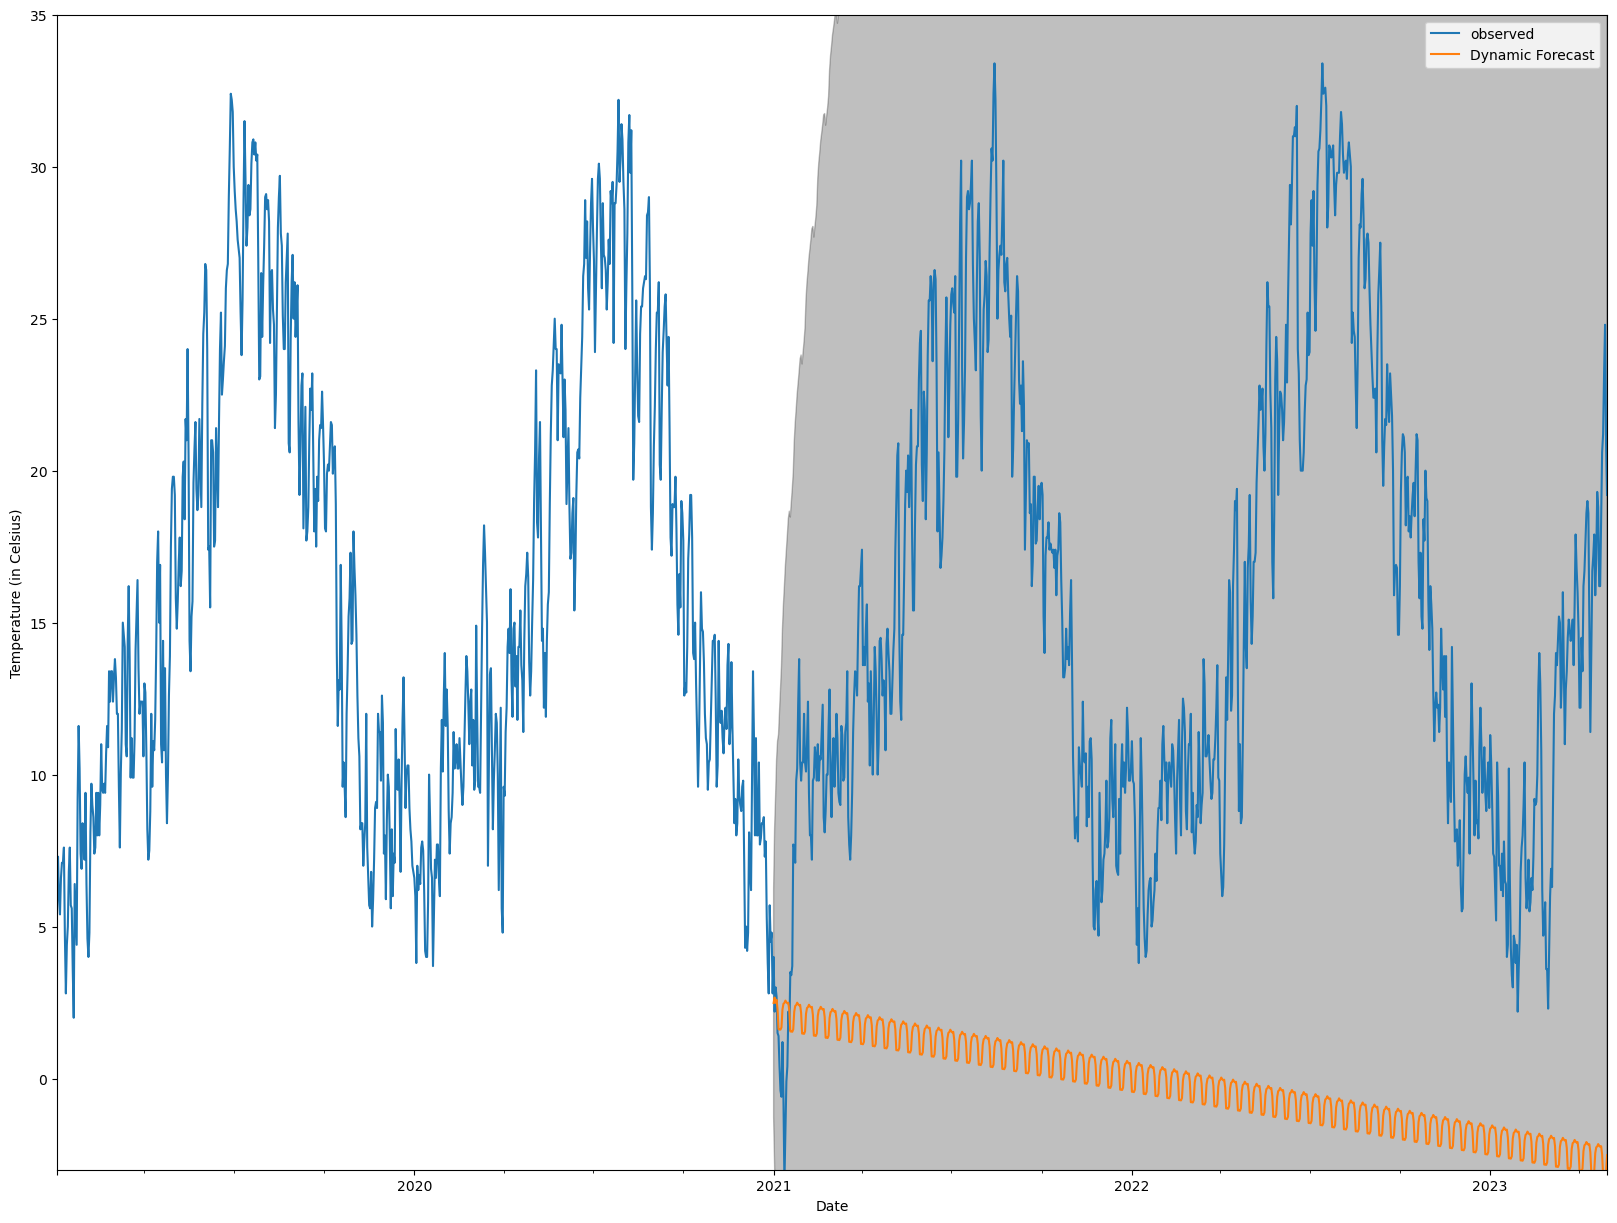

In [37]:
ax = one_step_df.temperature_actual['2019':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-3,35])
plt.legend()
plt.show()


In [39]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.temperature_actual['2021-01-01':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Root Mean Squared Error of our forecasts is 17.6
